# Compare and Contrast KNN with Naive Bayes
- Author: Sanjay S
- Regno: 2148023 2MDS

## Import necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report

## Data Description:
The dataset used for our problem has complete data about all the players and their attributes data in FIFA-19 games by EA Sports. It includes all competitive football player’s details. We can get the dataset from this [link](https://www.kaggle.com/karangadiya/fifa19)

We have 18207 player’s details with around 88 features for each player. The __position__ of the player is a feature which we would like to __predict__ with the help of the rest of the features available with us.

`fifa19_data.csv` includes lastest edition FIFA 2019 players attributes like Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.

In [3]:
df = pd.read_csv('fifa19_data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [16]:
df.shape

(18207, 89)

### Checking for null values

In [4]:
#check for missing values 
def checking_m(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
Loaned From,16943,0.930576
LWB,2085,0.114516
LCM,2085,0.114516
RS,2085,0.114516
LW,2085,0.114516
...,...,...
Nationality,0,0.000000
Photo,0,0.000000
Age,0,0.000000
Name,0,0.000000


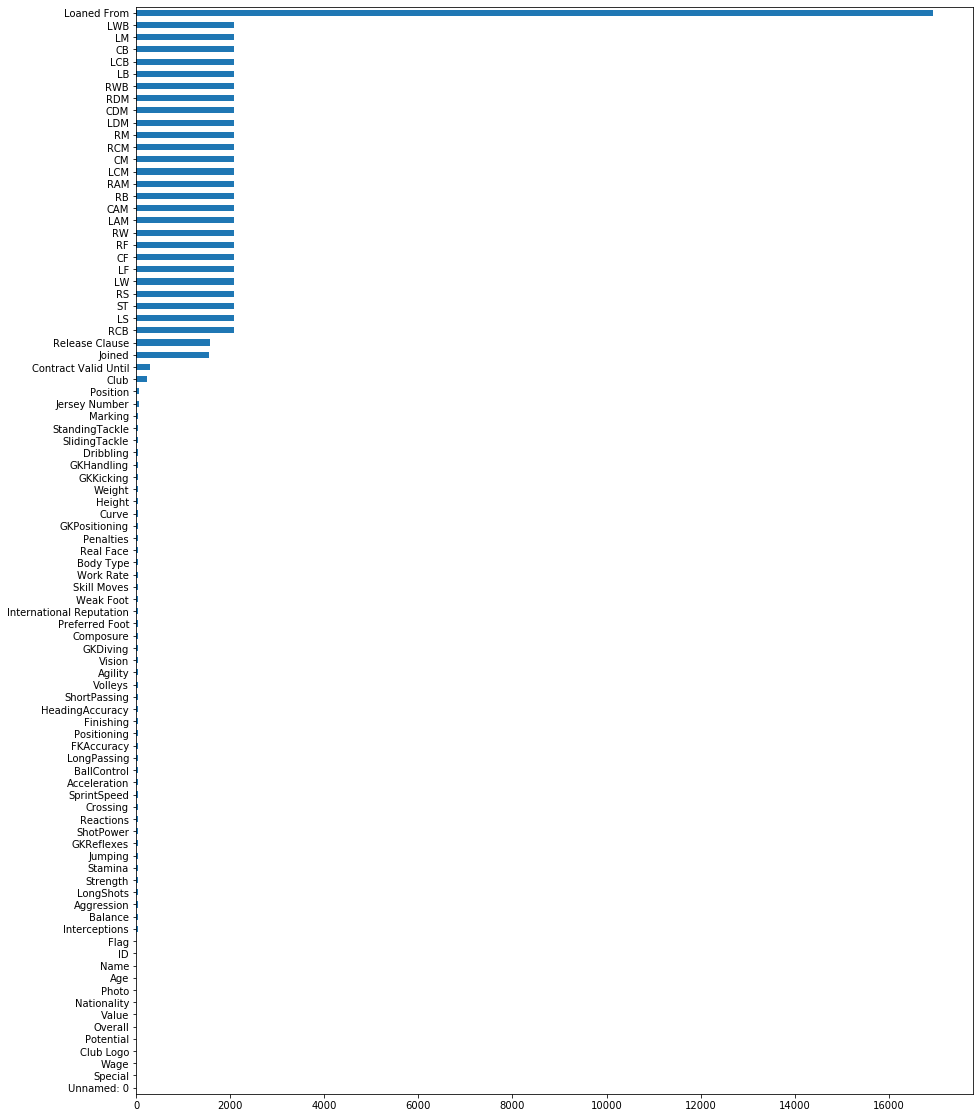

In [5]:
# plot null values in the dataset
plt.figure(figsize=(15,20))
df.isnull().sum().sort_values().plot(kind='barh')
plt.show()

In [6]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 0


## Exploratory data analysis

In [7]:
def horizontal_bar(data,x,y,title):
    fig,ax=plt.subplots(figsize=(10,5))
    sns.barplot(data=data,x=x,y=y,color='steelblue')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)

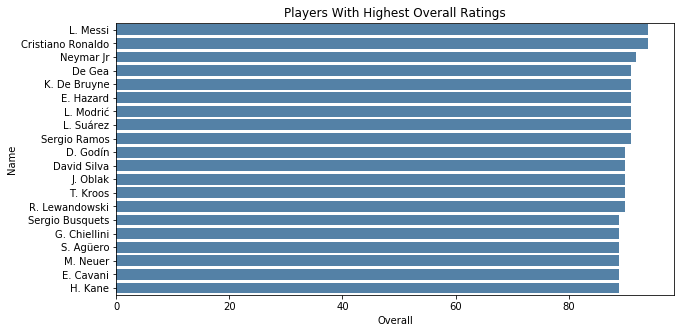

In [8]:
high_player_ovr=df[['Name','Overall']].sort_values(by='Overall',ascending=False).reset_index(drop=True)[:20]
horizontal_bar(high_player_ovr,'Overall','Name','Players With Highest Overall Ratings')

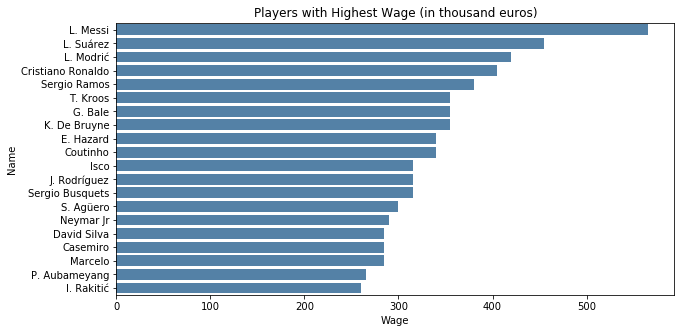

In [9]:
df['Wage']=df['Wage'].str.extract('(\d+)')
df['Wage']=df['Wage'].astype('float64')
highest_wage=df[['Name','Wage']].sort_values(by='Wage',ascending=False)[:20]
horizontal_bar(highest_wage,'Wage','Name','Players with Highest Wage (in thousand euros)')

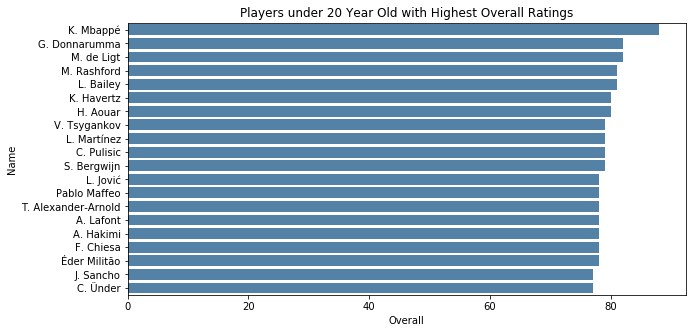

In [10]:
high_young_player_ovr=df[df['Age']<=20][['Name','Overall']].sort_values(by='Overall',ascending=False).reset_index(drop=True)[:20]
horizontal_bar(high_young_player_ovr,'Overall','Name','Players under 20 Year Old with Highest Overall Ratings')

## Remove all null values from `position`:

In [11]:
# Remove Missing Values 
na = pd.notnull(df["Position"])
df = df[na]

## Get the required features for our classification problem:

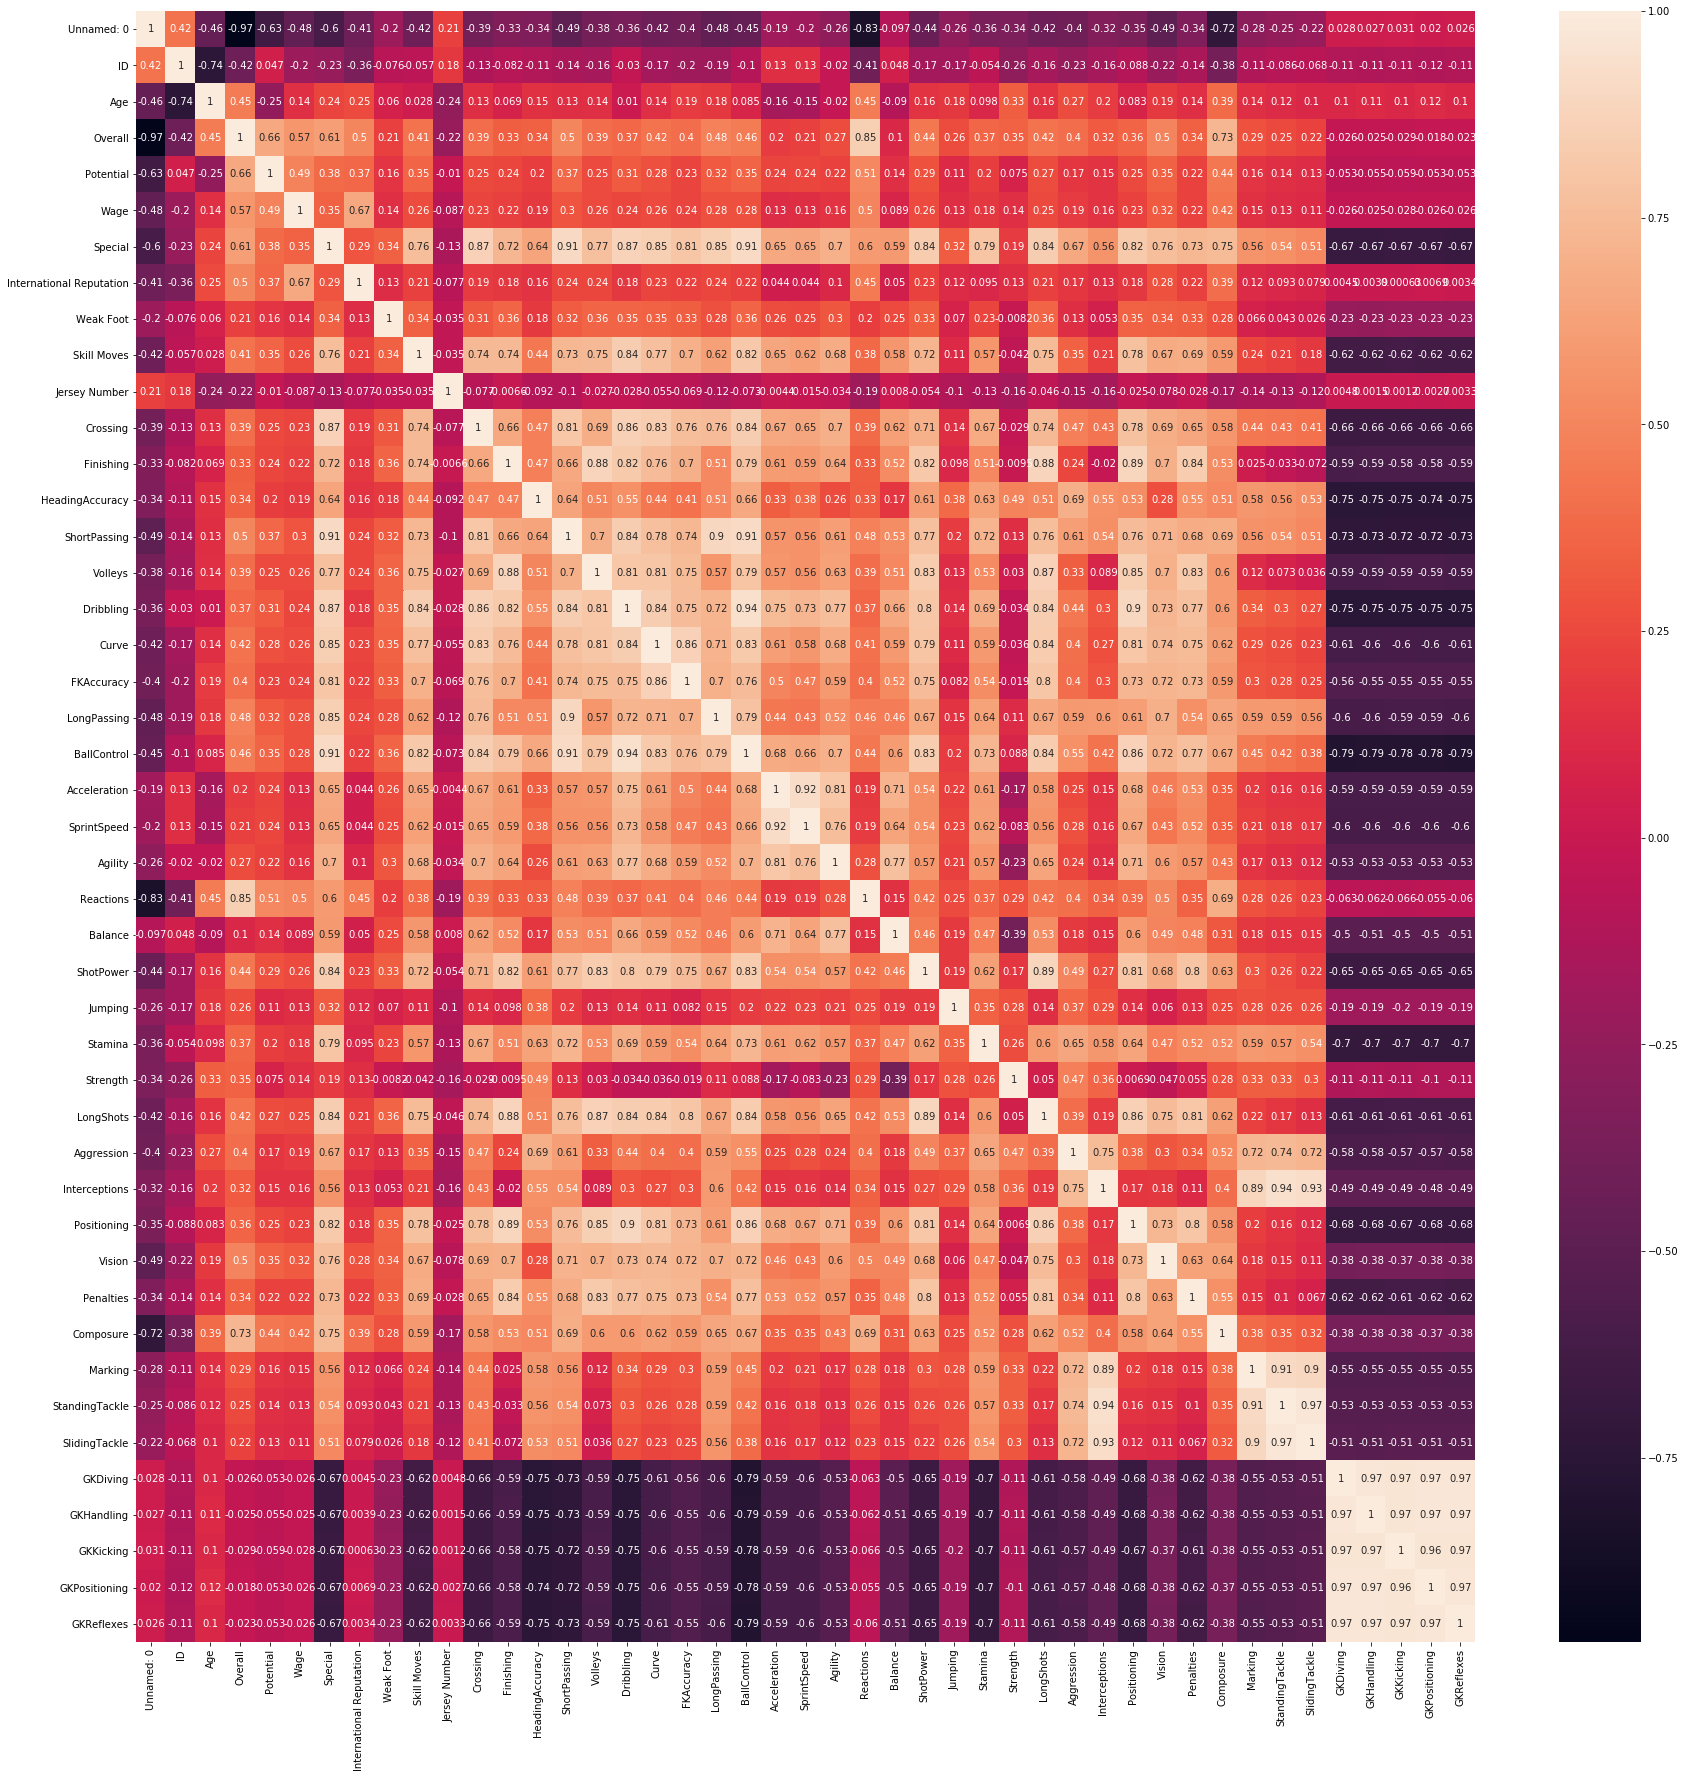

In [12]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(),annot= True)

In [13]:
df = df[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

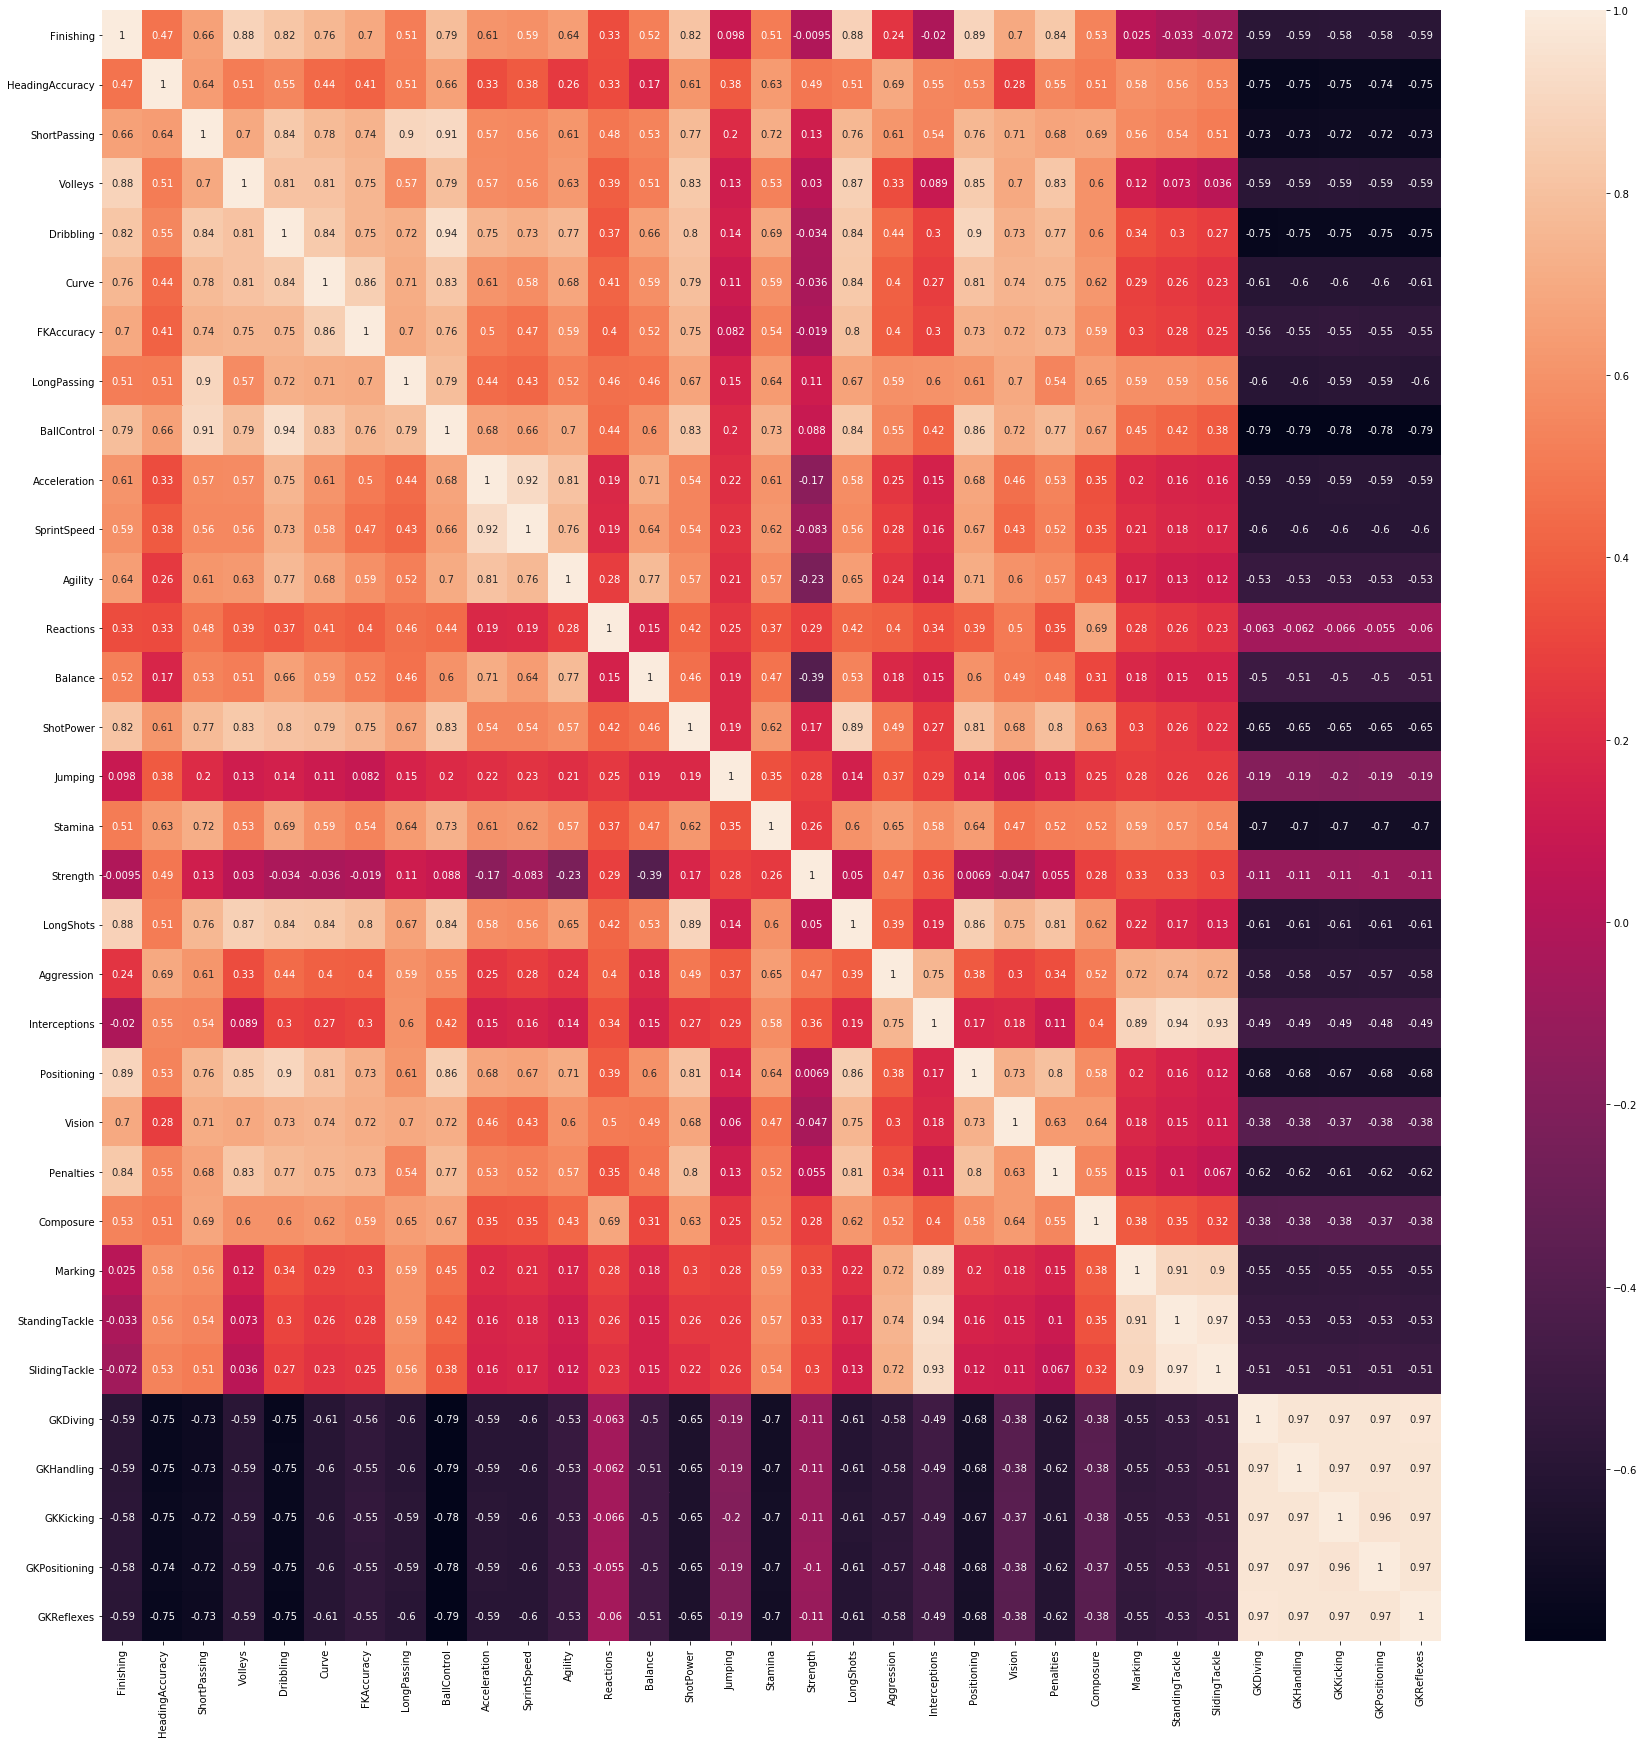

In [14]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(),annot= True)

## Categorizing positions:

In [15]:
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

In [16]:
df.loc[df["Position"] == "GK", "Position"] = 0

df.loc[df["Position"].isin(defender_player), "Position"] = 1

df.loc[df["Position"].isin(midfielder_player), "Position"] = 2

df.loc[df["Position"].isin(forward_player), "Position"] = 3

In [17]:
df['Position'].value_counts()

2    6838
1    5866
3    3418
0    2025
Name: Position, dtype: int64

## Standard Scaling of features:

In [19]:
X = df.drop("Position", axis = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

## Converting prediction to categorical:

In [20]:
df["Position"] = df["Position"].astype('category')
y = df["Position"]

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2)

## SMOTE - Oversampling

In [22]:
print("Before OverSampling, counts of label '3': {}".format(sum(y_train == 3)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train == 2)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
from sklearn.metrics import DistanceMetric
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '3': 2706
Before OverSampling, counts of label '2': 5514
Before OverSampling, counts of label '1': 4683
Before OverSampling, counts of label '0': 1614 

After OverSampling, the shape of X_train: (22056, 33)
After OverSampling, the shape of y_train: (22056,) 

After OverSampling, counts of label '3': 5514
After OverSampling, counts of label '2': 5514
After OverSampling, counts of label '1': 5514
After OverSampling, counts of label '0': 5514 



## 1. KNN Classifier

In [23]:
# KNN Model
classifier = KNeighborsClassifier(n_neighbors=3)
model = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


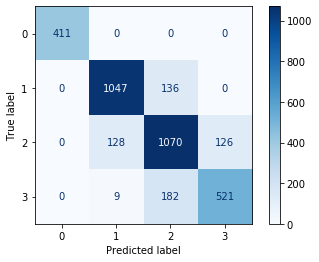

In [24]:
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.88      0.89      0.88      1183
           2       0.77      0.81      0.79      1324
           3       0.81      0.73      0.77       712

    accuracy                           0.84      3630
   macro avg       0.87      0.86      0.86      3630
weighted avg       0.84      0.84      0.84      3630



D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[1614    0    0    0]
 [   0 4385  297    1]
 [   0  281 4933  300]
 [   0   21  371 2314]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1614
           1       0.94      0.94      0.94      4683
           2       0.88      0.89      0.89      5514
           3       0.88      0.86      0.87      2706

    accuracy                           0.91     14517
   macro avg       0.93      0.92      0.92     14517
weighted avg       0.91      0.91      0.91     14517



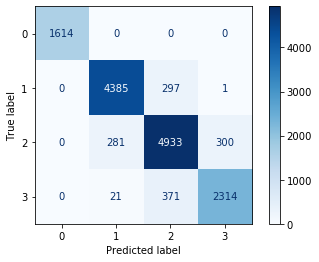

In [26]:
# to check training accuracy
train_y_pred = classifier.predict(X_train)

plot_confusion_matrix(model,X_train,y_train,cmap=plt.cm.Blues)

print(confusion_matrix(y_train, train_y_pred))
print(classification_report(y_train, train_y_pred))

In [27]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

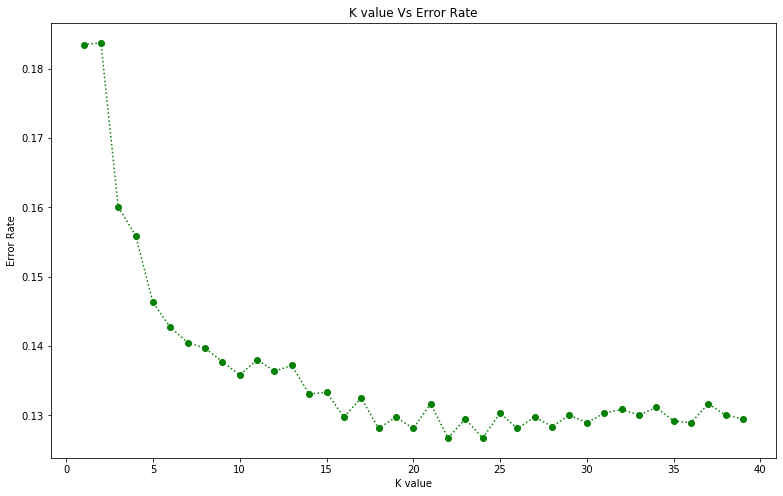

In [28]:
plt.figure(figsize=(13,8))
plt.plot(range(1,40), error, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('K value Vs Error Rate')
plt.show() 

#### From the output, we see an elbow is formed for k=10 and we can proceed with it and train our model again.

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.91      0.90      0.90      1183
           2       0.79      0.86      0.82      1324
           3       0.87      0.73      0.79       712

    accuracy                           0.86      3630
   macro avg       0.89      0.87      0.88      3630
weighted avg       0.87      0.86      0.86      3630



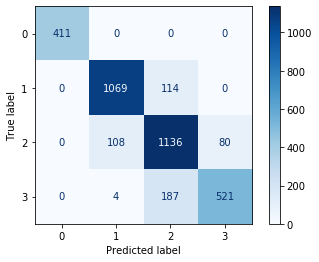

In [29]:
# KNN Model
classifier1 = KNeighborsClassifier(n_neighbors=10)
model1 = classifier1.fit(X_train,y_train)
y_pred1 = classifier1.predict(X_test)

plot_confusion_matrix(model1,X_test,y_test,cmap=plt.cm.Blues)

print(classification_report(y_test, y_pred1))

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1614
           1       0.91      0.92      0.92      4683
           2       0.83      0.88      0.85      5514
           3       0.88      0.76      0.82      2706

    accuracy                           0.88     14517
   macro avg       0.91      0.89      0.90     14517
weighted avg       0.89      0.88      0.88     14517



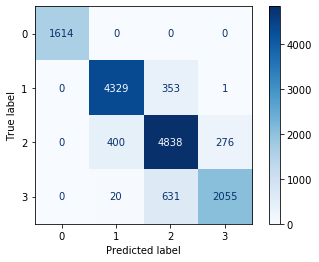

In [30]:
# to check training accuracy
train_y_pred1 = classifier1.predict(X_train)

plot_confusion_matrix(model1,X_train,y_train,cmap=plt.cm.Blues)

print(classification_report(y_train, train_y_pred1))

### __Inference:__

The accuracies with respect to __training__ and __testing__ datasets are __88%__ and __86%__ which suggests that our model is performing well and not overfitting. Optimizing the classifier with the right __n_neighbours__ value improved the model which was previously overfitting.

## 2. Naive Bayes Algorithm

scikit learn (python library) will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under the scikit-learn library:

- __Gaussian:__ It is used in classification and it assumes that features follow a normal distribution.

- __Multinomial:__ It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

- __Bernoulli:__ The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

In [31]:
# Create the object of the Naive Bayes model
model = GaussianNB()

# fit the model with the training data
model.fit(X_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train)

Target on train data [3 2 1 ... 1 1 0]


In [32]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.7818419783701867


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1614
           1       0.82      0.80      0.81      4683
           2       0.74      0.66      0.70      5514
           3       0.70      0.87      0.77      2706

    accuracy                           0.78     14517
   macro avg       0.81      0.83      0.82     14517
weighted avg       0.78      0.78      0.78     14517



D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


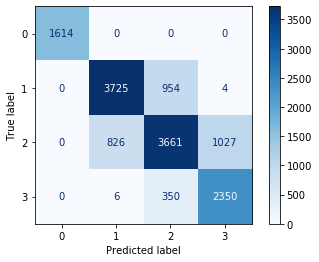

In [33]:
plot_confusion_matrix(model,X_train,y_train,cmap=plt.cm.Blues)

print(classification_report(y_train, predict_train))

In [34]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on test data [3 2 1 ... 1 0 0]
accuracy_score on test dataset :  0.7925619834710744


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.83      0.81      0.82      1183
           2       0.75      0.66      0.70      1324
           3       0.71      0.88      0.79       712

    accuracy                           0.79      3630
   macro avg       0.82      0.84      0.83      3630
weighted avg       0.79      0.79      0.79      3630



D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


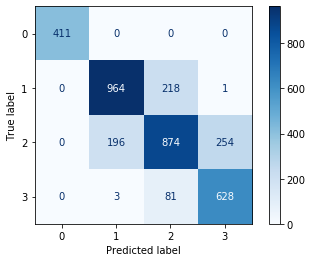

In [35]:
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)

print(classification_report(y_test, predict_test))

### __Inference:__

The Naive Bayes classifier performed poorly when compared to KNN Classifier with it's 79% Accuracy.